In [1]:
from lib import twoatoms
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [2]:
def projector(a,b):
    projector_ = np.zeros([4, 4])
    projector_[a,b] = 1
    return projector_

In [8]:
N_points = 100
detunings_IR = np.linspace(-200,200,N_points)
res = []
for detuning_IR in detunings_IR:
    rho0 = np.zeros([4,4])
    rho0[0,0] = 1
    atom = twoatoms.single_atom(power_blue=0.73e-3, waste_blue=90e-6, power_IR=20e-3, waste_IR=130e-6, detuning_blue=100, detuning_IR=detuning_IR)
    atom.evolve(time=10, steps=10000, initial_DM=rho0, include_spontaneous_emission=True, include_defasing=True)
    res.append(atom.evo_results.states[-1])
    clear_output(wait=True)
    print("status:", (detuning_IR-min(detunings_IR))/len(detunings_IR)*100, "%")

status: 400.0 %


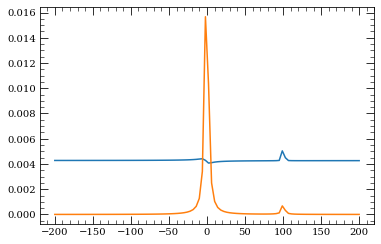

In [9]:
populations = {}
labels = [r"$P_1$",r"$P_2$",r"$P_3$"]

for l, label in enumerate(labels):
    populations[label] = [np.trace(np.dot(res[i],projector(l,l))) for i in range(N_points)]

for label in labels[1:]:
    plt.plot(detunings_IR, populations[label])

plt.show()